In [25]:
import librosa
import librosa.display
from matplotlib import pyplot as plt
import numpy as np

In [29]:
path = "data/speech/train/train_data/wav_001.wav"

In [10]:
y,sr = librosa.load(path)

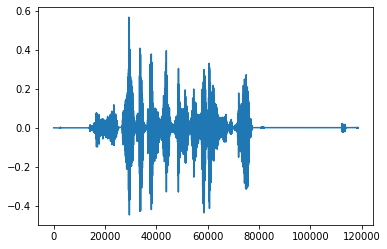

In [11]:
plt.plot(y)

In [32]:
y_stft = librosa.stft(y)

In [33]:
y_stft.shape

(1025, 232)

In [18]:
frame_length = 0.025
frame_stride = 0.010

In [34]:
def Mel_S(wav_file):
    y, sr = librosa.load(wav_file, sr=16000)
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))
    S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)
    print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))
    
    plt.figure(figsize=(10,5))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.tight_layout()
    plt.show()
    return S

Wav length: 5.15, Mel_S shape:(40, 516)


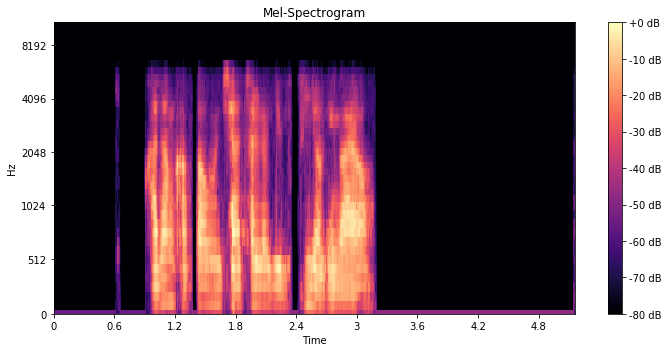

In [35]:
mel = Mel_S(path)

In [48]:
def Stft(wav):
    y, sr = librosa.load(wav, sr=16000)
    S_full, phase = librosa.magphase(librosa.stft(y))
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max),
                             y_axis='log', x_axis='time', sr=sr)
    plt.colorbar()
    plt.tight_layout()

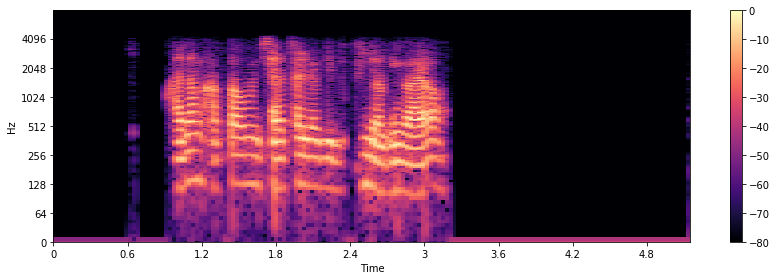

In [49]:
Stft(path)